In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial para mejores gráficos
plt.style.use('default')
sns.set_palette("husl")

In [3]:
with open('movies.json', 'r', encoding='utf-8') as file:
    movies_data = json.load(file)

# Crear DataFrame
df = pd.DataFrame(movies_data)

df.head()

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time min,Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   3200 non-null   object 
 1   US Gross                3194 non-null   float64
 2   Worldwide Gross         3194 non-null   float64
 3   US DVD Sales            564 non-null    float64
 4   Production Budget       3200 non-null   float64
 5   Release Date            3201 non-null   object 
 6   MPAA Rating             2596 non-null   object 
 7   Running Time min        1209 non-null   float64
 8   Distributor             2969 non-null   object 
 9   Source                  2836 non-null   object 
 10  Major Genre             2926 non-null   object 
 11  Creative Type           2755 non-null   object 
 12  Director                1870 non-null   object 
 13  Rotten Tomatoes Rating  2321 non-null   float64
 14  IMDB Rating             2988 non-null   

In [5]:
non_numeric_attributes = df.select_dtypes(exclude=['number']).columns.values
pd.DataFrame(non_numeric_attributes, columns=['Non Numeric Attributes'])

,Non Numeric Attributes
0,Title
1,Release Date
2,MPAA Rating
3,Distributor
4,Source
5,Major Genre
6,Creative Type
7,Director


In [6]:
df[non_numeric_attributes].describe()


,Title,Release Date,MPAA Rating,Distributor,Source,Major Genre,Creative Type,Director
count,3200,3201,2596,2969,2836,2926,2755,1870
unique,3176,1600,7,174,18,12,9,550
top,Friday the 13th,Oct 11 2002,R,Warner Bros.,Original Screenplay,Drama,Contemporary Fiction,Steven Spielberg
freq,2,9,1194,318,1536,789,1453,23


In [13]:
analyzed_non_numeric_attributes = [col for col in non_numeric_attributes if col != 'Title' and col != 'Release Date' and col != 'Director' and col != 'Distributor']

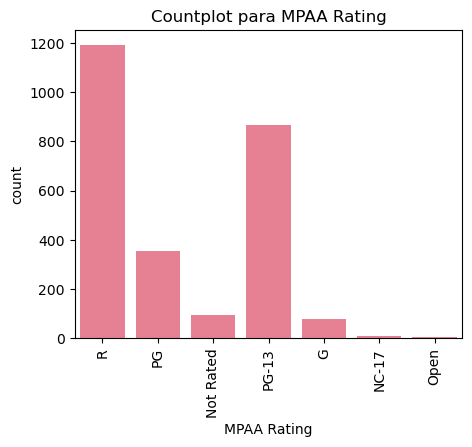

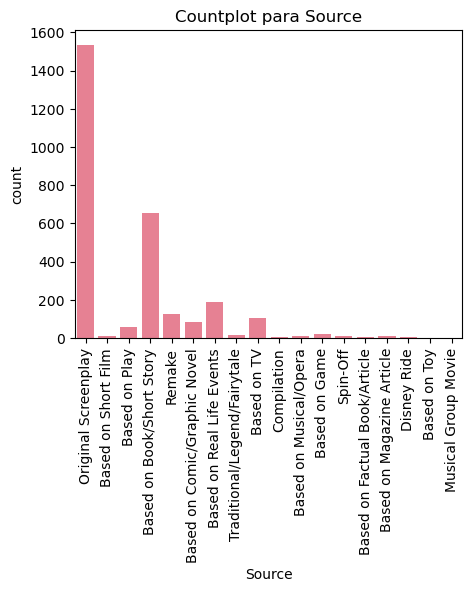

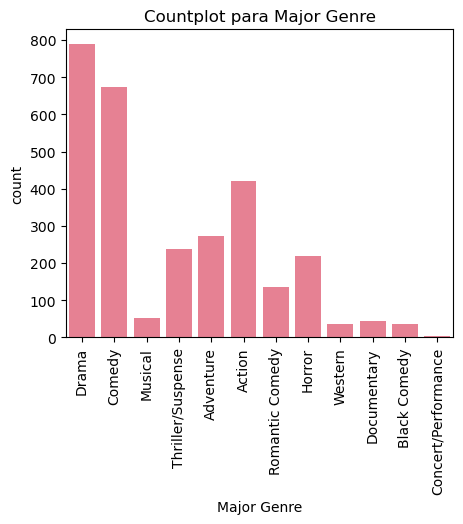

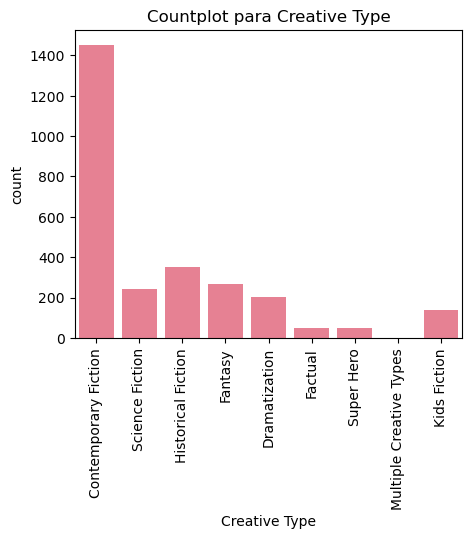

In [14]:
for col in analyzed_non_numeric_attributes:
    plt.figure(figsize=(5, 4))
    ax = sns.countplot(data=df, x=col)
    for label in ax.get_xticklabels():
        label.set_rotation(90)
    plt.title(f"Countplot para {col}")

    plt.show()

In [15]:
numeric_attributes = df.select_dtypes(include=['number']).columns.values
pd.DataFrame(numeric_attributes, columns=['Numeric Attributes'])

,Numeric Attributes
0,US Gross
1,Worldwide Gross
2,US DVD Sales
3,Production Budget
4,Running Time min
5,Rotten Tomatoes Rating
6,IMDB Rating
7,IMDB Votes


In [16]:
df[numeric_attributes].describe()

,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Running Time min,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
count,3.194000e+03,3.194000e+03,5.640000e+02,3.200000e+03,1209.000000,2321.000000,2988.000000,2988.000000
mean,4.400209e+07,8.534340e+07,3.490155e+07,3.106917e+07,110.193548,54.336924,6.283467,29908.644578
std,6.255531e+07,1.499473e+08,4.589512e+07,3.558591e+07,20.171014,28.076593,1.252290,44937.582335
min,0.000000e+00,0.000000e+00,6.184540e+05,2.180000e+02,46.000000,1.000000,1.400000,18.000000
25%,5.493221e+06,8.031285e+06,9.906211e+06,6.575000e+06,95.000000,30.000000,5.600000,4828.500000
50%,2.201947e+07,3.116893e+07,2.033156e+07,2.000000e+07,107.000000,55.000000,6.400000,15106.000000
75%,5.609176e+07,9.728380e+07,3.779422e+07,4.200000e+07,121.000000,80.000000,7.200000,35810.500000
max,7.601676e+08,2.767891e+09,3.525821e+08,3.000000e+08,222.000000,100.000000,9.200000,519541.000000
